# **TALLER 02 CALCULO DE RAICES**
## **Fecha:** 06/05/2025
## **Nombres:** 
- Christopher Criollo
- Joseph Jimenez

1. Encuentre todas las raíces del polinomio $x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672 = 0$.

2. Encuentre todos los puntos en los que la curva $\left(\frac{y}{2}\right)^2 = \left(\frac{x+3}{2}\right)^2 - 1$ intersecta el eje $y = -2$.

3. Dada la función $f(x) = \frac{\sin(x)}{x}$. ¿A partir de qué valor $x_T$ se cumple que $f(x) < 0.015,\ \forall x \geq x_T$?

# **EJERCICIO 2** 

Encuentre todos los puntos en los que la curva $\left(\frac{y}{2}\right)^2 = \left(\frac{x+3}{2}\right)^2 - 1$ intersecta el eje $y = -2$.

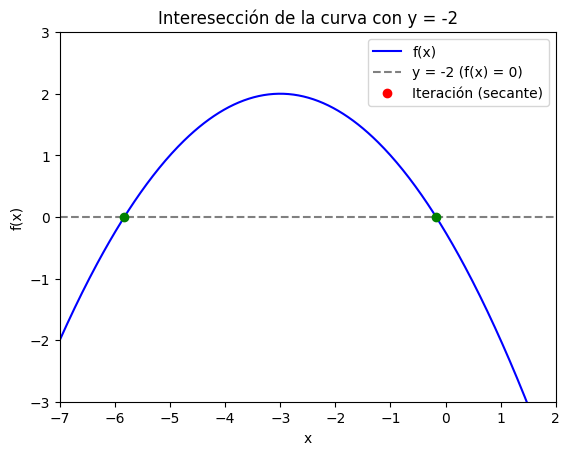

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x):
    return 2 - ((x + 3)/2)**2

# Metodo de la secante para encontrar la raíz
# f(x) = 0, que es la intersección con y = -2

def MetodoSecante(f, x0, x1, tol=1e-6, max_iter=20):
    pasos = [(x0, f(x0)), (x1, f(x1))]
    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if abs(f_x1) < tol:
            break
        if f_x1 - f_x0 == 0:
            break
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        pasos.append((x2, f(x2)))
        x0, x1 = x1, x2
    return pasos

# Obtencioón de pasos desde ambos lados de la raíz
steps_1 = MetodoSecante(f, -6.5, -5.5)
steps_2 = MetodoSecante(f, 0, 1)

# Crear Grafica
fig, ax = plt.subplots()
x_vals = np.linspace(-7, 2, 400)
y_curve = f(x_vals)

ax.plot(x_vals, y_curve, label='f(x)', color='blue')
ax.axhline(0, color='gray', linestyle='--', label='y = -2 (f(x) = 0)')
point, = ax.plot([], [], 'ro', label='Iteración (secante)')
ax.set_xlim(-7, 2)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title("Interesección de la curva con y = -2")
ax.legend()

# Puntos de corte en x e y
roots_x = [step[0] for step in all_steps if abs(step[1]) < 1e-6]
roots_y = [0] * len(roots_x)  
ax.scatter(roots_x, roots_y, color='green', label='Puntos de corte', zorder=5)

# Combinar pasos de ambos extremos
all_steps = steps_1 + steps_2

# Iniciaalizar animación
def init(): 
    point.set_data([], [])
    return point,

# Actualizar animación
def actuAni(frame):
    x, y = all_steps[frame]
    point.set_data([x], [y])
    return point,

ani = FuncAnimation(fig, actuAni, frames=len(all_steps),
                    init_func=init, blit=True, interval=800, repeat=False)

plt.show()
# Guardar la animación
ani.save('InterseccionCurva.gif', writer='pillow', fps=2)